<a href="https://colab.research.google.com/github/ajilmathews05/AJ05/blob/main/internship_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Loading and Inspection

In [2]:
df=pd.read_csv('/content/Electronic - Electronic.csv.csv')

In [3]:
df

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24,1,39.583865,46.041613,1.000000,0,Male,West,Television,Credit Card,-64.457793,4.187345,9.136240,0.0,Morning
4996,66,5,172.486538,32.751346,1.000000,0,Male,East,Accessories,Debit Card,138.772917,3.868131,1.961965,0.0,Evening
4997,26,11,493.388104,5.000000,2.324783,0,Male,North,Television,Net Banking,1010.219124,4.172183,16.750489,0.0,Evening
4998,53,10,260.269589,23.973041,5.000000,1,Female,West,Accessories,Debit Card,1114.585926,3.942221,25.562475,1.0,Afternoon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [5]:
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


# Check For Missing values

In [8]:
df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


# Data Cleaning: Handling missing values

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
# Impute missing values with the median for numerical columns and the most frequent value for categorical columns
imputer_numeric = SimpleImputer(strategy="median")
imputer_categorical = SimpleImputer(strategy="most_frequent")

# Identifying categorical and numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Applying imputers
df[numerical_cols] = imputer_numeric.fit_transform(df[numerical_cols])
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

In [13]:
missing_values_final_check = df.isnull().sum()
missing_values_final_check

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


# Standardize categorical values, such as region and product category.

In [ ]:
# Convert to lowercase and remove any extra spaces
df['Region'] = df['Region'].str.lower().str.strip()
df['Product Category'] = df['Product Category'].str.lower().str.strip()

# Verify the unique values after standardization
print("Unique values in 'Region':", df['Region'].unique())
print("Unique values in 'Product Category':", df['Product Category'].unique())


Unique values in 'Region': ['south' 'east' 'north' 'west']
Unique values in 'Product Category': ['accessories' 'laptop' 'tablet' 'television' 'mobile']


# Normalize numerical fields like "Total Spent" and "Discount (%)"

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df[['Total Spent', 'Discount (%)']] = scaler.fit_transform(df[['Total Spent', 'Discount (%)']])

# View the normalized data
print(df[['Total Spent', 'Discount (%)']].head())


   Total Spent  Discount (%)
0     0.020629      0.967531
1     0.591722      0.068654
2     0.164552      0.741001
3     0.588186      0.074219
4     0.866210      0.000000


# Distribution of satisfaction scores, loyalty scores, and preferred visit times.

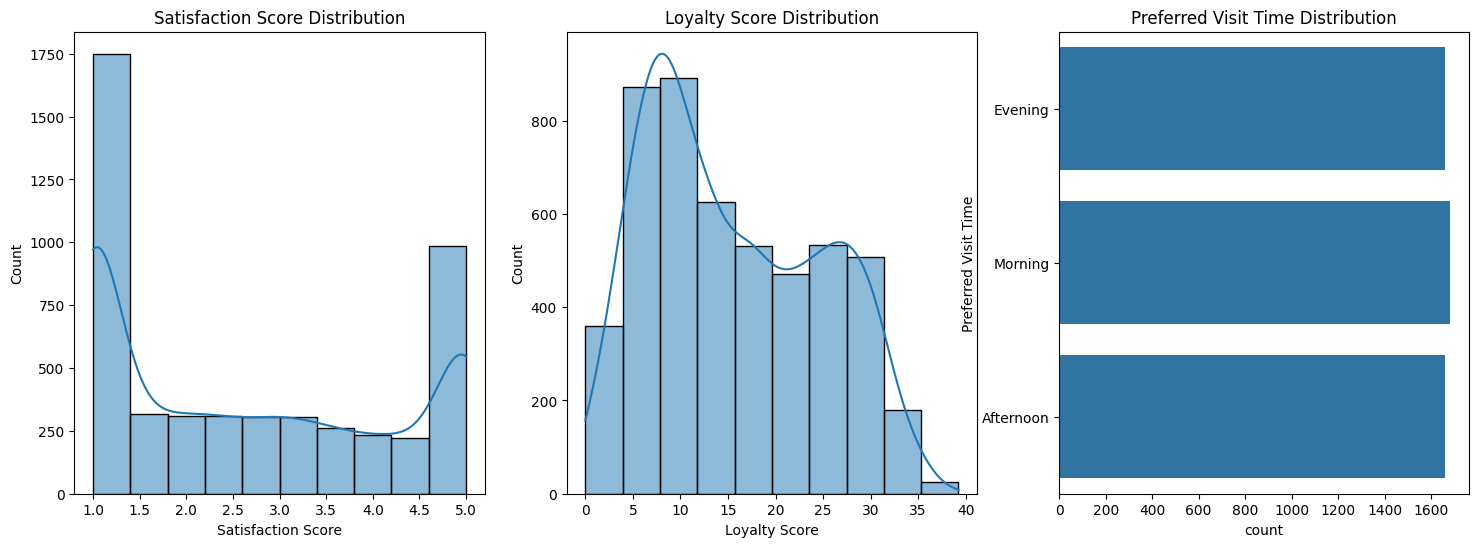

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Satisfaction Score Distribution
sns.histplot(df['Satisfaction Score'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Satisfaction Score Distribution")

# Loyalty Score Distribution
sns.histplot(df['Loyalty Score'], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Loyalty Score Distribution")

# Preferred Visit Time Distribution
sns.countplot(df['Preferred Visit Time'], ax=axes[2])
axes[2].set_title("Preferred Visit Time Distribution")

plt.show()


# Relationships between features, e.g., how "Items Purchased" and "Total Spent" impact "Satisfaction Score" or "Loyalty Score."

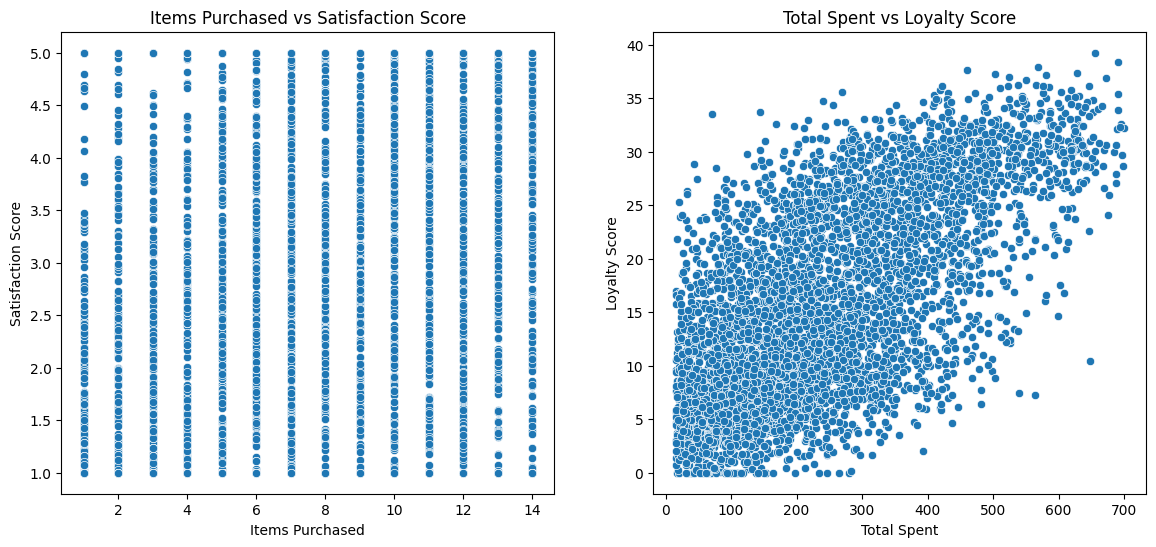

Correlation Matrix:
                     Items Purchased  Total Spent  Satisfaction Score  \
Items Purchased            1.000000     0.836032            0.494572   
Total Spent                0.836032     1.000000            0.597239   
Satisfaction Score         0.494572     0.597239            1.000000   
Loyalty Score              0.557782     0.669716            0.935086   

                    Loyalty Score  
Items Purchased          0.557782  
Total Spent              0.669716  
Satisfaction Score       0.935086  
Loyalty Score            1.000000  


In [ ]:
# Scatter plots to visualize relationships
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Items Purchased vs Satisfaction Score
sns.scatterplot(x='Items Purchased', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title("Items Purchased vs Satisfaction Score")

# Total Spent vs Loyalty Score
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title("Total Spent vs Loyalty Score")

plt.show()

# Calculate correlation coefficients for numeric relationships
correlations = df[['Items Purchased', 'Total Spent', 'Satisfaction Score', 'Loyalty Score']].corr()
print("Correlation Matrix:\n", correlations)


Correlation Heat Map

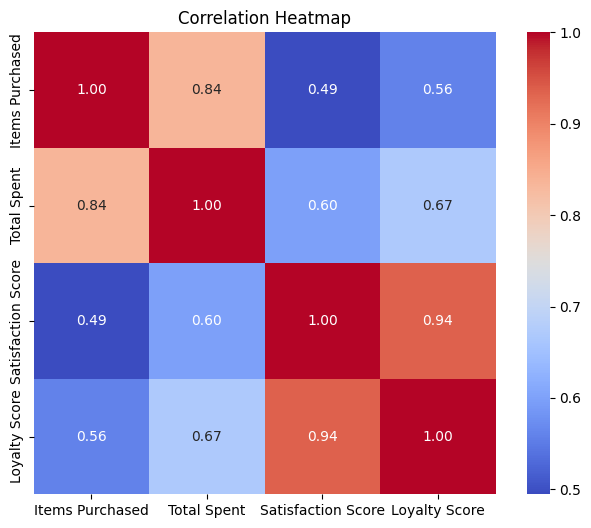

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['Items Purchased', 'Total Spent', 'Satisfaction Score', 'Loyalty Score']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


# customer data based on features such as"Region" and "Product Category" to identify potential insights

In [ ]:
# Segment analysis by Region
region_segment = df.groupby('Region').agg({
    'Satisfaction Score': 'mean',
    'Loyalty Score': 'mean',
    'Total Spent': 'sum',
    'Items Purchased': 'sum'
}).sort_values(by='Satisfaction Score', ascending=False)
print("Segment Analysis by Region:\n", region_segment)

# Segment analysis by Product Category
product_category_segment = df.groupby('Product Category').agg({
    'Satisfaction Score': 'mean',
    'Loyalty Score': 'mean',
    'Total Spent': 'sum',
    'Items Purchased': 'sum'
}).sort_values(by='Satisfaction Score', ascending=False)
print("\nSegment Analysis by Product Category:\n", product_category_segment)

# Cross-segmentation by Region and Product Category
region_product_segment = df.groupby(['Region', 'Product Category']).agg({
    'Satisfaction Score': 'mean',
    'Loyalty Score': 'mean',
    'Total Spent': 'sum',
    'Items Purchased': 'sum'
}).sort_values(by='Satisfaction Score', ascending=False)
print("\nCross-segmentation by Region and Product Category:\n", region_product_segment)


Segment Analysis by Region:
         Satisfaction Score  Loyalty Score    Total Spent  Items Purchased
Region                                                                   
north             2.688928      15.910227  298856.109396           9188.0
east              2.664952      15.726079  290955.462903           8992.0
south             2.625350      15.462415  320884.553717           9845.0
west              2.625032      15.480349  307913.060307           9658.0

Segment Analysis by Product Category:
                   Satisfaction Score  Loyalty Score    Total Spent  \
Product Category                                                     
television                  2.709702      15.965189  245113.222846   
accessories                 2.667060      15.810278  246663.329943   
tablet                      2.657758      15.787878  245031.013990   
mobile                      2.617103      15.357037  238880.547871   
laptop                      2.599353      15.272068  242921.071673 

**Region Insights**

1.Highest Satisfaction and Loyalty: The "north" and "east" regions have slightly higher average satisfaction and loyalty scores compared to "south" and "west." This could indicate higher customer engagement or satisfaction in these regions.

2.Total Spending and Purchases: The "south" and "west" regions have higher total spending and items purchased, suggesting larger market sizes or higher demand in these areas, even though their satisfaction scores are slightly lower.

**Product Category Insights**

1.Top Product for Satisfaction and Loyalty: "Television" shows the highest satisfaction and loyalty scores among product categories. This could mean customers are particularly satisfied with this product, which might drive loyalty.

2.Moderate Satisfaction Categories: "Accessories" and "Tablet" also have relatively high satisfaction and loyalty, indicating a strong response from customers purchasing these items.
Lower Satisfaction Categories: "Mobile" and "Laptop" have the lowest satisfaction scores, which could be due to customer expectations, quality concerns, or product issues.

**Cross-Segmentation by Region and Product Category**

1.High-Satisfaction Segments:

South - Television: The highest satisfaction (2.79) and loyalty (16.67), along with high total spending, indicating a strong preference and positive experience for televisions in the southern region.

North - Tablet and East - Accessories: Both segments show high satisfaction and loyalty scores, suggesting specific strengths in these region-product combinations.
Potential Areas for Improvement:

South - Laptop: With the lowest satisfaction and loyalty scores, laptops in the southern region may need attention regarding quality or customer service.

West - Accessories and Mobile: Slightly lower satisfaction scores in these categories could indicate room for improvement in product or service.

**Summary**
Focus Areas for Marketing: Televisions in the south and tablets in the north are promising segments that could be emphasized in marketing.
Improvement Opportunities: Addressing issues in lower satisfaction segments like laptops in the south and mobile accessories in the west could enhance customer satisfaction and loyalty.